<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

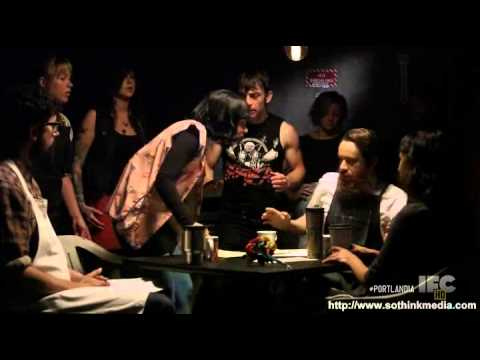

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'D:\\CSFiles\\lambda\\git\\nlp\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [3]:
import pandas as pd
import re
import numpy as np

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
print(shops.shape)
shops.head(5)

(7616, 3)


,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [4]:


def get_date_and_delete(df, column_name):
    df['date'] = df[column_name].apply(lambda x: re.match(r"[\d]{1,2}\/[\d]{1,2}\/[\d]{4}", x.strip()).group())
    df[column_name] = df[column_name].apply(lambda x: re.sub(r"[\d]{1,2}\/[\d]{1,2}\/[\d]{4}", '', x.strip()))
    return df

def get_checks_and_delete(df, column_name):
    df['check_ins'] = df[column_name].apply(lambda x:
                                            re.findall(r"[\d]+ check-in", x.strip())[0][0]
                                            if re.findall(r"[\d]+ check-in", x.strip()) else '0')
    df[column_name] = df[column_name].apply(lambda x: re.sub(r"[\d]+ check-in[s]*", '', x.strip()))
    return df
    


In [5]:
# Cleaning

shops = get_date_and_delete(shops, 'full_review_text')
shops = get_checks_and_delete(shops, 'full_review_text')
shops['star_rating'] = shops['star_rating'].apply(lambda x: float(x[:4].strip()))
shops['check_ins'] = shops['check_ins'].astype(int)
shops['date'] = pd.to_datetime(shops['date'])

In [6]:
shops.head()

,coffee_shop_name,full_review_text,star_rating,date,check_ins
0,The Factory - Cafe With a Soul,Love love loved the atmosphere! Every corner ...,5.0,2016-11-25,1
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4.0,2016-12-02,0
2,The Factory - Cafe With a Soul,Listed in Brunch Spots I loved the eclectic a...,4.0,2016-11-30,1
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating How...,2.0,2016-11-25,0
4,The Factory - Cafe With a Soul,They are located within the Northcross mall s...,4.0,2016-12-03,1


In [7]:
shops.dtypes

coffee_shop_name            object
full_review_text            object
star_rating                float64
date                datetime64[ns]
check_ins                    int32
dtype: object

In [8]:
import squarify
import matplotlib.pyplot as plt
import seaborn as sns
import spacy
from spacy.tokenizer import Tokenizer
nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

In [16]:
def get_lemmas(text):

    lemmas = []
    
    doc = nlp(text)
    
    # Something goes here :P
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False) and (token.is_space == False)) and (token.pos_!= 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

In [17]:
shops['lemmas'] = shops['full_review_text'].apply(get_lemmas)

In [18]:
from collections import Counter
count = Counter()
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

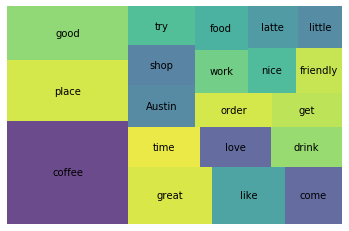

In [19]:
wc = count(shops['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [22]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
25,coffee,4847,10135,1.0,0.028575,0.028575,0.636423
96,place,3875,6029,2.0,0.016999,0.045574,0.508797
161,good,3575,5344,3.0,0.015067,0.060641,0.469407
120,great,2846,3921,4.0,0.011055,0.071696,0.373687
167,like,2273,3379,5.0,0.009527,0.081223,0.298451


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [24]:
good_shops = shops[shops['star_rating'] > 3.0]
bad_shops = shops[shops['star_rating'] <= 3.0]
good_shops['lemmas'] = good_shops['full_review_text'].apply(get_lemmas)
bad_shops['lemmas'] = bad_shops['full_review_text'].apply(get_lemmas)

<ipython-input-24-9d8cf177e374>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  good_shops['lemmas'] = good_shops['full_review_text'].apply(get_lemmas)
<ipython-input-24-9d8cf177e374>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bad_shops['lemmas'] = bad_shops['full_review_text'].apply(get_lemmas)


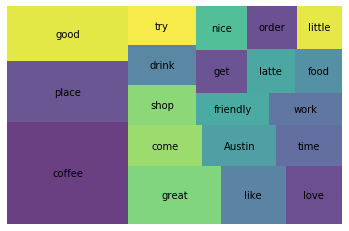

In [25]:
good_wc = count(good_shops['lemmas'])
good_wc_top20 = good_wc[good_wc['rank'] <= 20]

squarify.plot(sizes=good_wc_top20['pct_total'], label=good_wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

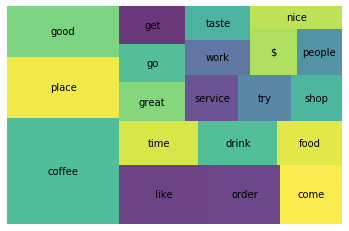

In [26]:
bad_wc = count(bad_shops['lemmas'])
bad_wc_top20 = bad_wc[bad_wc['rank'] <= 20]

squarify.plot(sizes=bad_wc_top20['pct_total'], label=bad_wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [28]:
good_shops.head()

,coffee_shop_name,full_review_text,star_rating,date,check_ins,lemmas
0,The Factory - Cafe With a Soul,Love love loved the atmosphere! Every corner ...,5.0,2016-11-25,1,"[Love, love, love, atmosphere, corner, coffee,..."
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4.0,2016-12-02,0,"[list, Date, Night, Austin, Ambiance, Austin, ..."
2,The Factory - Cafe With a Soul,Listed in Brunch Spots I loved the eclectic a...,4.0,2016-11-30,1,"[list, Brunch, Spots, love, eclectic, homey, p..."
4,The Factory - Cafe With a Soul,They are located within the Northcross mall s...,4.0,2016-12-03,1,"[locate, Northcross, mall, shopping, center, f..."
5,The Factory - Cafe With a Soul,Very cute cafe! I think from the moment I ste...,4.0,2016-11-20,1,"[cute, cafe, think, moment, step, find, cute, ..."


In [34]:
good_wc[good_wc['appears_in_pct'] < 0.1].head(30)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
1949,breakfast,599,801,43.0,0.002896,0.251362,0.097557
198,study,556,716,53.0,0.002589,0.278808,0.090554
473,milk,474,690,55.0,0.002495,0.283834,0.077199
183,cup,549,685,56.0,0.002477,0.286311,0.089414
642,feel,586,684,57.0,0.002473,0.288785,0.095440
2232,gelato,335,675,58.0,0.002441,0.291226,0.054560
631,iced,545,674,59.0,0.002437,0.293663,0.088762
80,cool,582,672,60.0,0.002430,0.296093,0.094788
548,area,569,662,61.0,0.002394,0.298487,0.092671
193,sit,571,649,62.0,0.002347,0.300833,0.092997


In [41]:
bad_wc['word']

21         coffee
19          place
24           good
31           like
88          order
          ...    
7544         atop
7549         dull
7548       tasted
7551          imo
7553    efficient
Name: word, Length: 7554, dtype: object

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [74]:
good_difference = []
for ii in good_wc['word'].index:
    word = good_wc['word'].iloc[ii]
    if word in bad_wc['word'].values:
        good_difference.append((word, good_wc['pct_total'].iloc[ii] - bad_wc.loc[bad_wc['word'] == word, 'pct_total'].item()))
print(good_difference)

<ipython-input-74-ebe2d94e2265>:5: FutureWarning: `item` has been deprecated and will be removed in a future version
  good_difference.append((word, good_wc['pct_total'].iloc[ii] - bad_wc.loc[bad_wc['word'] == word, 'pct_total'].item()))


[('people', -0.001069412475203274), ('sure', -7.171783065885876e-05), ('variety', 0.000653319767686735), ('star', -0.0013659614573372548), ('fan', 0.00037564969127594895), ('know', -0.00043434025226416536), ('head', -0.00011308687693611111), ('taste', -0.0021270087534531524), ('person', -0.0006433997362904431), ('nice', 0.0005483862036392674), ('food', -0.0013855516044819815), ('sit', -0.000558487331318904), ('home', 0.00033021706284521216), ('bag', 0.0001259468419647157), ('flavor', 0.0009171900573909466), ('look', -0.0011677218861622573), ('time', -0.0014287768760933564), ('glad', 0.000356803829955082), ('latte', 0.0009707877077212348), ('girl', -0.0007702464597101472), ('welcoming', 0.0001340340660487029), ('mind', -0.00010195369019217409), ('area', 0.0004484229990209252), ('cut', -0.00016452192386027435), ('favorite', 0.0020439835355876646), ('easily', 5.695688688289505e-05), ('worth', 2.6664564925434368e-05), ('amazing', 0.002191431129824976), ('day', 0.0006515530491790857), ('ser

In [75]:
good_df = pd.DataFrame(good_difference, columns=['word', 'difference'])
good_df.head()

,word,difference
0,people,-0.001069
1,sure,-0.000072
2,variety,0.000653
3,star,-0.001366
4,fan,0.000376


In [76]:
good_df['difference'] = abs(good_df['difference'].astype(float))
good_df.nlargest(15, ['difference'])

,word,difference
872,great,0.006595
2310,order,0.004760
2833,love,0.004421
214,Austin,0.003503
343,delicious,0.003318
1157,like,0.003293
332,ask,0.002908
2450,good,0.002893
264,$,0.002877
410,friendly,0.002800


In [77]:
bad_difference = []
for ii in bad_wc['word'].index:
    word = bad_wc['word'].iloc[ii]
    if word in good_wc['word'].values:
        bad_difference.append((word, bad_wc['pct_total'].iloc[ii] - good_wc.loc[good_wc['word'] == word, 'pct_total'].item()))
print(bad_difference)

<ipython-input-77-2f6decb48ece>:5: FutureWarning: `item` has been deprecated and will be removed in a future version
  bad_difference.append((word, bad_wc['pct_total'].iloc[ii] - good_wc.loc[good_wc['word'] == word, 'pct_total'].item()))


[('want', 0.0012899018976649818), ('nice', -0.0005483862036392674), ('think', 0.0011774298595032752), ('wait', 0.0015789172188749791), ('guy', 0.0009487519971201979), ('serve', 0.00010150134286955213), ('second', 0.0004586514911196188), ('get', 0.0004343519612750738), ('friendly', -0.0027997706164035957), ('bring', 0.00012553924805533065), ('different', -7.424327456113239e-05), ('know', 0.00043434025226416536), ('coffee', -0.001980721230628653), ('tea', -0.0009279486946278267), ('instead', 0.0005896843479216086), ('fairly', 0.00011803863153367518), ('study', -0.00060529352391867), ('say', 0.0022239542266236168), ('day', -0.0006515530491790857), ('good', -0.0028930084520960714), ('cool', -0.0002542070697764305), ('honestly', 0.00020348807746405415), ('decor', -0.00012662295635352074), ('clear', 0.00011271232742905386), ('change', 0.00015538403588042477), ('dirty', 0.00031948665682040515), ('idea', 0.0004536102296955814), ('honey', 5.1899103257693844e-05), ('fresh', -0.000642862695331603

In [78]:
bad_df = pd.DataFrame(bad_difference, columns=['word', 'difference'])
bad_df.head()

,word,difference
0,want,0.001290
1,nice,-0.000548
2,think,0.001177
3,wait,0.001579
4,guy,0.000949


In [79]:
bad_df['difference'] = abs(bad_df['difference'].astype(float))
bad_df.nlargest(15, ['difference'])

,word,difference
399,great,0.006595
545,order,0.004760
36,love,0.004421
1861,Austin,0.003503
43,delicious,0.003318
34,like,0.003293
1221,ask,0.002908
19,good,0.002893
1648,$,0.002877
8,friendly,0.002800


## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

